# Image features exercise
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. For more details see the [assignments page](http://vision.stanford.edu/teaching/cs231n/assignments.html) on the course website.*

We have seen that we can achieve reasonable performance on an image classification task by training a linear classifier on the pixels of the input image. In this exercise we will show that we can improve our classification performance by training linear classifiers not on raw pixels but on features that are computed from the raw pixels.

All of your work for this exercise will be done in this notebook.

In [4]:
import random
import numpy as np
from data_utils import load_CIFAR10
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load data
Similar to previous exercises, we will load CIFAR-10 data from disk.

In [5]:
from features import color_histogram_hsv, hog_feature


def get_CIFAR10_data(num_training=49000, num_validation=1000, num_test=1000):
  # Load the raw CIFAR-10 data
  cifar10_dir = 'datasets/cifar-10-batches-py'
  X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)
  
  # Subsample the data
  mask = range(num_training, num_training + num_validation)
  X_val = X_train[mask]
  y_val = y_train[mask]
  mask = range(num_training)
  X_train = X_train[mask]
  y_train = y_train[mask]
  mask = range(num_test)
  X_test = X_test[mask]
  y_test = y_test[mask]

  return X_train, y_train, X_val, y_val, X_test, y_test

X_train, y_train, X_val, y_val, X_test, y_test = get_CIFAR10_data()

## Extract Features
For each image we will compute a Histogram of Oriented
Gradients (HOG) as well as a color histogram using the hue channel in HSV
color space. We form our final feature vector for each image by concatenating
the HOG and color histogram feature vectors.

Roughly speaking, HOG should capture the texture of the image while ignoring
color information, and the color histogram represents the color of the input
image while ignoring texture. As a result, we expect that using both together
ought to work better than using either alone. Verifying this assumption would
be a good thing to try for the bonus section.

The `hog_feature` and `color_histogram_hsv` functions both operate on a single
image and return a feature vector for that image. The extract_features
function takes a set of images and a list of feature functions and evaluates
each feature function on each image, storing the results in a matrix where
each column is the concatenation of all feature vectors for a single image.

In [6]:
from features import *

num_color_bins = 24 # Number of bins in the color histogram
feature_fns = [hog_feature, lambda img: color_histogram_hsv(img, nbin=num_color_bins)]
X_train_feats = extract_features(X_train, feature_fns, verbose=True)
X_val_feats = extract_features(X_val, feature_fns)
X_test_feats = extract_features(X_test, feature_fns)

# Preprocessing: Subtract the mean feature
mean_feat = np.mean(X_train_feats, axis=0, keepdims=True)
X_train_feats -= mean_feat
X_val_feats -= mean_feat
X_test_feats -= mean_feat

# Preprocessing: Divide by standard deviation. This ensures that each feature
# has roughly the same scale.
std_feat = np.std(X_train_feats, axis=0, keepdims=True)
X_train_feats /= std_feat
X_val_feats /= std_feat
X_test_feats /= std_feat

# Preprocessing: Add a bias dimension
X_train_feats = np.hstack([X_train_feats, np.ones((X_train_feats.shape[0], 1))])
X_val_feats = np.hstack([X_val_feats, np.ones((X_val_feats.shape[0], 1))])
X_test_feats = np.hstack([X_test_feats, np.ones((X_test_feats.shape[0], 1))])

Done extracting features for 1000 / 49000 images
Done extracting features for 2000 / 49000 images
Done extracting features for 3000 / 49000 images
Done extracting features for 4000 / 49000 images
Done extracting features for 5000 / 49000 images
Done extracting features for 6000 / 49000 images
Done extracting features for 7000 / 49000 images
Done extracting features for 8000 / 49000 images
Done extracting features for 9000 / 49000 images
Done extracting features for 10000 / 49000 images
Done extracting features for 11000 / 49000 images
Done extracting features for 12000 / 49000 images
Done extracting features for 13000 / 49000 images
Done extracting features for 14000 / 49000 images
Done extracting features for 15000 / 49000 images
Done extracting features for 16000 / 49000 images
Done extracting features for 17000 / 49000 images
Done extracting features for 18000 / 49000 images
Done extracting features for 19000 / 49000 images
Done extracting features for 20000 / 49000 images
Done extr

## Train SVM on features
Using the multiclass SVM code developed earlier in the assignment, train SVMs on top of the features extracted above; this should achieve better results than training SVMs directly on top of raw pixels.

In [7]:
# Use the validation set to tune the learning rate and regularization strength

from classifiers.linear_classifier import LinearSVM

learning_rates = [1e-9,2.5e-9,5e-9,7.5e-9, 1e-8, 2.5e-8,5e-8,7.5e-8, 1e-7 ]
regularization_strengths = [1e5,2.5e5,5e5,7.5e5, 1e6,2.5e6,5e6,7.5e6, 1e7]

results = {}
best_val = -1
best_svm = None

pass
################################################################################
# TODO:                                                                        #
# Use the validation set to set the learning rate and regularization strength. #
# This should be identical to the validation that you did for the SVM; save    #
# the best trained classifer in best_svm. You might also want to play          #
# with different numbers of bins in the color histogram. If you are careful    #
# you should be able to get accuracy of near 0.44 on the validation set.       #
################################################################################
for lr in learning_rates:
    for rs in regularization_strengths:
        
        #create a new one every time so we can save the best
        #import pdb; pdb.set_trace()
        svm = LinearSVM()
        svm.train(X_train_feats, y_train, learning_rate=lr, reg=rs,num_iters=1500)
        
        #get train and validation accuracy
        y_train_pred = svm.predict(X_train_feats)
        train_acc = (np.mean(y_train == y_train_pred), )
        
        y_val_pred = svm.predict(X_val_feats)
        val_acc = (np.mean(y_val == y_val_pred), )
        
        #save
        results[(lr,rs)] = (train_acc,val_acc)
        
        #keep track of highest validation accuracy
        if (val_acc > best_val):
            best_val = val_acc
            best_svm = svm


for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print "type " + str(type(train_accuracy))
    #import pdb;pdb.set_trace()
    print 'lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, float(train_accuracy[0]), float(val_accuracy[0]))
    
print 'best validation accuracy achieved during cross-validation: %f' % best_val

type <type 'tuple'>
lr 1.000000e-09 reg 1.000000e+05 train accuracy: 0.134286 val accuracy: 0.154000
type <type 'tuple'>
lr 1.000000e-09 reg 2.500000e+05 train accuracy: 0.087980 val accuracy: 0.082000
type <type 'tuple'>
lr 1.000000e-09 reg 5.000000e+05 train accuracy: 0.095408 val accuracy: 0.100000
type <type 'tuple'>
lr 1.000000e-09 reg 7.500000e+05 train accuracy: 0.108980 val accuracy: 0.090000
type <type 'tuple'>
lr 1.000000e-09 reg 1.000000e+06 train accuracy: 0.096592 val accuracy: 0.111000
type <type 'tuple'>
lr 1.000000e-09 reg 2.500000e+06 train accuracy: 0.094469 val accuracy: 0.088000
type <type 'tuple'>
lr 1.000000e-09 reg 5.000000e+06 train accuracy: 0.138184 val accuracy: 0.145000
type <type 'tuple'>
lr 1.000000e-09 reg 7.500000e+06 train accuracy: 0.404265 val accuracy: 0.395000
type <type 'tuple'>
lr 1.000000e-09 reg 1.000000e+07 train accuracy: 0.423163 val accuracy: 0.417000
type <type 'tuple'>
lr 2.500000e-09 reg 1.000000e+05 train accuracy: 0.101857 val accuracy:

In [8]:
# Evaluate your trained SVM on the test set
y_test_pred = best_svm.predict(X_test_feats)
test_accuracy = np.mean(y_test == y_test_pred)
print test_accuracy

0.42


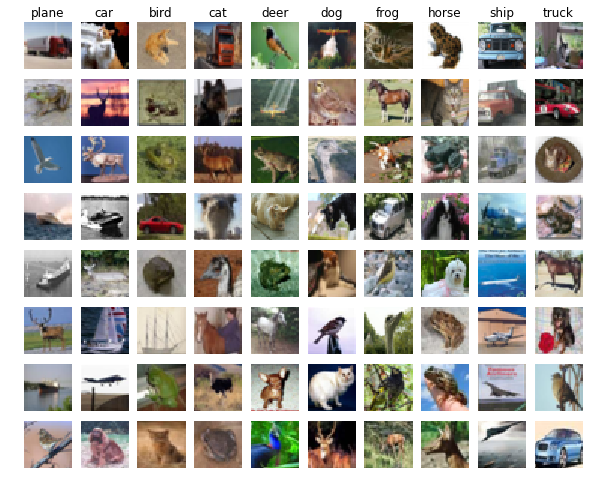

In [9]:
# An important way to gain intuition about how an algorithm works is to
# visualize the mistakes that it makes. In this visualization, we show examples
# of images that are misclassified by our current system. The first column
# shows images that our system labeled as "plane" but whose true label is
# something other than "plane".

examples_per_class = 8
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for cls, cls_name in enumerate(classes):
    idxs = np.where((y_test != cls) & (y_test_pred == cls))[0]
    idxs = np.random.choice(idxs, examples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt.subplot(examples_per_class, len(classes), i * len(classes) + cls + 1)
        plt.imshow(X_test[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls_name)
plt.show()

### Inline question 1:
Describe the misclassification results that you see. Do they make sense?
Mostly, there is a color corelation (high blue for airplane or ship) and the 
somewhat, (row,col)
(3,1) has a lot of blue in it which pictures of planes do plus a large angled surface much like a plane
(7,8) does not really except a frog likely has a lot of brown in the pic and the canoe has brown water

## Neural Network on image features
Earlier in this assigment we saw that training a two-layer neural network on raw pixels achieved better classification performance than linear classifiers on raw pixels. In this notebook we have seen that linear classifiers on image features outperform linear classifiers on raw pixels. 

For completeness, we should also try training a neural network on image features. This approach should outperform all previous approaches: you should easily be able to achieve over 55% classification accuracy on the test set; our best model achieves about 60% classification accuracy.

In [10]:
print X_train_feats.shape

(49000, 169)


In [11]:
#a small subset
NUMB_RANDOM_SAMPLES = 5000
NUMB_VALIDATION_SAMPLES = 100

rand_X_train = X_train_feats[:NUMB_RANDOM_SAMPLES,:]
rand_y_train = y_train[:NUMB_RANDOM_SAMPLES]
print rand_X_train.shape
print rand_y_train.shape

rand_X_val = X_val_feats [:NUMB_VALIDATION_SAMPLES,:]
rand_y_val  = y_val [:NUMB_VALIDATION_SAMPLES]
print rand_X_val.shape
print rand_y_val.shape

(5000, 169)
(5000,)
(100, 169)
(100,)


Keith Comments the std initilization in two layer net made a big difference, if you use the default the loss is very small and you essentially get a vanishing gradient.  Result no training, no accuracy improvement.


In [54]:
from classifiers.neural_net import TwoLayerNet

input_size = rand_X_train.shape[1]
hidden_size = 1500
num_classes = 10
np.random.seed(0)   #ensures consistent result

net = TwoLayerNet(input_size, hidden_size, num_classes, std=.01,use_smart_w1_init = True)

# Train the network
#stats = net.train(rand_X_train, rand_y_train, rand_X_val, rand_y_val,
stats = net.train(X_train_feats, y_train, X_val_feats, y_val,
            num_iters=2000, batch_size=200,
            learning_rate=1, learning_rate_decay=0.95,
            reg=0.0005, verbose=True, dropout_prob = .5)

# Predict on the validation set
val_acc = (net.predict(X_val_feats) == y_val).mean()
print 'Validation accuracy: ', val_acc

# Predict on the training set
train_acc = (net.predict(rand_X_train) == rand_y_train).mean()
print 'Training accuracy: ', train_acc

iteration 0 / 2000: loss 2.835964
iteration 100 / 2000: loss 1.887567
iteration 200 / 2000: loss 1.843625
iteration 300 / 2000: loss 1.682666
iteration 400 / 2000: loss 1.717549
iteration 500 / 2000: loss 1.522393
iteration 600 / 2000: loss 1.553310
iteration 700 / 2000: loss 1.631022
iteration 800 / 2000: loss 1.562072
iteration 900 / 2000: loss 1.444744
iteration 1000 / 2000: loss 1.333675
iteration 1100 / 2000: loss 1.378943
iteration 1200 / 2000: loss 1.348797
iteration 1300 / 2000: loss 1.312908
iteration 1400 / 2000: loss 1.110677
iteration 1500 / 2000: loss 1.247951
iteration 1600 / 2000: loss 1.194431
iteration 1700 / 2000: loss 1.358993
iteration 1800 / 2000: loss 1.126418
iteration 1900 / 2000: loss 1.244737
Validation accuracy:  0.587
Training accuracy:  0.7682


In [ ]:
from classifiers.neural_net import TwoLayerNet

input_dim = X_train_feats.shape[1]
hidden_dim = 1500
num_classes = 10

#net = TwoLayerNet(input_dim, hidden_dim, num_classes,std=.01)
best_net = None

################################################################################
# TODO: Train a two-layer neural network on image features. You may want to    #
# cross-validate various parameters as in previous sections. Store your best   #
# model in the best_net variable.                                              #
################################################################################
import collections as cl
import time

def saveandprint(aFile,aString):
    print aString
    fobj.write(aString +"\n")
    
Result = cl.namedtuple('Result',('validation_accuracy','hidden_size', 'dropout_prob', 'learning_rate', 'batch_size','learning_rate_decay','reg'))
class RandomSearchResults(object):
    def __init__(self):
        self._results = []
    def addResult(self,validation_accuracy,hidden_size, dropout_prob, learning_rate, batch_size, learning_rate_decay, reg ):
        self._results.append(Result(validation_accuracy,hidden_size, dropout_prob, learning_rate, batch_size, learning_rate_decay, reg))

    def getHighest(self):
        return sorted(self._results, key=lambda x: x.validation_accuracy, reverse=True)[0]

myresults =    RandomSearchResults()
MAX_ATTEMPTS=100

NUM_ITERS=1000
LOG_FILE = "results_features.txt"

input_size = 169

#a small subset
rand_X_train = X_train_feats[:NUMB_RANDOM_SAMPLES,:]
rand_y_train = y_train[:NUMB_RANDOM_SAMPLES]

rand_X_val = X_val_feats [:NUMB_VALIDATION_SAMPLES,:]
rand_y_val  = y_val [:NUMB_VALIDATION_SAMPLES]

#save the time this takes
start = time.time()
fobj = open(LOG_FILE,"w")

#lets try a bunch of random hyperparameters and save the best
for i in range(MAX_ATTEMPTS):
    
    #rhidden_size = np.random.randint(50,120)
    rhidden_size = 1500    #np.random.randint(90,500)
    rdropout_prob = np.random.randint(50,95)/100.0  #between .5 and .99
    rlearning_rate = np.random.uniform(.5,.99)
    rbatch_size = np.random.randint(100,300)
    rlearning_rate_decay = 0.95 # np.random.randint(85,99)/100.0  #between .85 and .99
    rReg = np.random.randint(50,70)/100000.0  #between .0005 and .0007
    
    net = TwoLayerNet(input_size, rhidden_size, num_classes,std=.01, use_smart_w1_init = True)

    #train
    stats = net.train(rand_X_train, rand_y_train, rand_X_val, rand_y_val,
            num_iters=NUM_ITERS, batch_size=rbatch_size,
            learning_rate=rlearning_rate, learning_rate_decay=rlearning_rate_decay,
            reg=rReg, verbose=False, dropout_prob =rdropout_prob)

    # Predict on the validation set
    val_acc = (net.predict(rand_X_val) == rand_y_val).mean()
    saveandprint(fobj, "Attempt " + str(i) + ", " + str(NUM_ITERS) + " iterations, Validation accuracy = " + str(val_acc))
    
    #keep track of results
    myresults.addResult(val_acc, rhidden_size, rdropout_prob, rlearning_rate, rbatch_size, rlearning_rate_decay, rReg)

    
best = myresults.getHighest()


saveandprint(fobj, "")
saveandprint(fobj, "Best predicted accuracy is : " + str(best.validation_accuracy))
saveandprint(fobj, "Best hidden_size is        : " + str(best.hidden_size))
saveandprint(fobj, "Best dropout_prob is       : " + str(best.dropout_prob))
saveandprint(fobj, "Best learning_rate is      : " + str(best.learning_rate))
saveandprint(fobj, "Best batch_size is         : " + str(best.batch_size))
saveandprint(fobj, "Best learning_rate_decay is: " + str(best.learning_rate_decay))
saveandprint(fobj, "Best Reg is                : " + str(best.reg))
saveandprint(fobj, "")
saveandprint(fobj, "Hyperparameter selection took " + str((time.time() -start)/60) + " minutes")
saveandprint(fobj, "")

#Lets do this for a while
best_net = TwoLayerNet(input_size, best.hidden_size, num_classes,std=.01, use_smart_w1_init = True)

#train for 2000 iterations
large_iter = 2000
stats = best_net.train(X_train_feats, y_train, X_val_feats, y_val,
        num_iters=large_iter, batch_size=best.batch_size,
        learning_rate=best.learning_rate, learning_rate_decay=best.learning_rate_decay,
        reg=best.reg, verbose=True, dropout_prob =best.dropout_prob)

# Predict on the validation set
val_acc = (best_net.predict(X_val_feats) == y_val).mean()
saveandprint(fobj, "After " + str(large_iter) + " iterations using best hyperparameters, Validation accuracy = " + str(val_acc))
saveandprint(fobj, "")
saveandprint(fobj, "Total time " + str((time.time()-start)/60) + " minutes")
fobj.close()

Attempt 0, 1000 iterations, Validation accuracy = 0.55
Attempt 1, 1000 iterations, Validation accuracy = 0.55
Attempt 2, 1000 iterations, Validation accuracy = 0.52
Attempt 3, 1000 iterations, Validation accuracy = 0.51

In [ ]:
# Run your neural net classifier on the test set. You should be able to
# get more than 55% accuracy.

test_acc = (net.predict(X_test_feats) == y_test).mean()
print test_acc

# Bonus: Design your own features!

You have seen that simple image features can improve classification performance. So far we have tried HOG and color histograms, but other types of features may be able to achieve even better classification performance.

For bonus points, design and implement a new type of feature and use it for image classification on CIFAR-10. Explain how your feature works and why you expect it to be useful for image classification. Implement it in this notebook, cross-validate any hyperparameters, and compare its performance to the HOG + Color histogram baseline.

# Bonus: Do something extra!
Use the material and code we have presented in this assignment to do something interesting. Was there another question we should have asked? Did any cool ideas pop into your head as you were working on the assignment? This is your chance to show off!